## ACME: Intro to NumPy
- Problems 1 -7

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from scipy import stats

### Problem 1

In [2]:
A = np.array([[3, -1, 4],
              [1, 5, -9]])

B = np.array([[2, 6, -5, 3],
              [5, -8, 9, 7],
              [9, -3, -2, -3]])

AB = A @ B
print(AB)

[[ 37  14 -32 -10]
 [-54  -7  58  65]]


### Problem2

In [3]:
def Cayley_Hamilton(matrix):
    '''input a matrix A, return -A**3 + 9*A**2 -15*A'''
    A = np.array(matrix)
    return -np.linalg.matrix_power(A, 3) + 9*A@A - 15*A 

A_list = [[3, 1, 4],
          [1, 5, 9],
          [-5, 3, 1]]

print(Cayley_Hamilton(A_list))

[[0 0 0]
 [0 0 0]
 [0 0 0]]


### Problem 3

In [4]:
def problem_3():
    A = np.triu(np.ones((7, 7)))
    B = -np.tril(np.ones((7, 7))) + np.triu(np.full((7, 7), 5)) - 5 * np.eye(7)
    return np.int64(A @ B @ A)

print(problem_3())

[[ -7  -8  -3   8  25  48  77]
 [ -6 -12 -12  -6   6  24  48]
 [ -5 -10 -15 -14  -7   6  25]
 [ -4  -8 -12 -16 -14  -6   8]
 [ -3  -6  -9 -12 -15 -12  -3]
 [ -2  -4  -6  -8 -10 -12  -8]
 [ -1  -2  -3  -4  -5  -6  -7]]


### Problem 4

In [5]:
def problem_4(array):
    A = array.copy()
    A[A < 0] = 0
    return A

print(problem_4(np.array([-1, 2, 5, -45])))

[0 2 5 0]


### Problem 5

In [6]:
def problem_5():
    A = np.arange(6).reshape(3, 2).T
    B = np.tril(np.full((3,3),3))
    C = -2 * np.eye(3)
    I = np.ones((3,3))
    first_row = np.hstack((np.zeros(6).reshape((3,-1)), A.T, I))
    second_row = np.hstack((A, np.zeros((2, 4))))
    third_row = np.column_stack((B, np.zeros(3), C))
    return np.vstack((first_row, second_row, third_row))
    
print(problem_5())

[[ 0.  0.  0.  1.  1.  1.  1.]
 [ 0.  0.  2.  3.  1.  1.  1.]
 [ 0.  0.  4.  5.  1.  1.  1.]
 [ 0.  2.  4.  0.  0.  0.  0.]
 [ 1.  3.  5.  0.  0.  0.  0.]
 [ 3.  0.  0.  0. -2. -0. -0.]
 [ 3.  3.  0.  0. -0. -2. -0.]
 [ 3.  3.  3.  0. -0. -0. -2.]]


### Problem 6

In [7]:
def problem_6(matrix):
    '''input matrix, return row-stochastic matrix,
    matrix entries should be positive'''
    row_sum = matrix.sum(axis = 1)
    return matrix / row_sum.reshape((matrix.shape[0],1))

A_matrix = np.arange(20).reshape((4,5))

print(problem_6(A_matrix))

[[0.         0.1        0.2        0.3        0.4       ]
 [0.14285714 0.17142857 0.2        0.22857143 0.25714286]
 [0.16666667 0.18333333 0.2        0.21666667 0.23333333]
 [0.17647059 0.18823529 0.2        0.21176471 0.22352941]]


### Problem 6

In [8]:
def problem_7(grid):
    '''
    input grid, 
    return the greatest product of four adjacent numbers in the same direction'''
    right_max = np.max(grid[:, :-3] * grid[:, 1:-2] * grid[:, 2:-1] * grid[:, 3:])
    left_max = np.max(grid[:, 3:] * grid[:, 2:-1] * grid[:, 1:-2] * grid[:, :-3])
    down_max = np.max(grid[:-3, :] * grid[1:-2, :] * grid[2:-1, :] * grid[3:, :])
    up_max = np.max(grid[3:, :] * grid[2:-1, :] * grid[1:-2, :] * grid[:-3, :])
    right_diag_max = np.max(grid[:-3, :-3] * grid[1:-2, 1:-2] * grid[2:-1, 2:-1] * grid[3:, 3:])
    left_diag_max = np.max(grid[3:, 3:] * grid[2:-1, 2:-1] * grid[1:-2, 1:-2] * grid[:-3, :-3])
    
    return np.max((right_max, left_max, down_max, up_max, right_diag_max, left_diag_max))

grid = np.load('grid.npy')
print(problem_7(grid))

51267216


## ACME: Python Standard Library
- problems 1-5

### Problem 1

In [9]:
min_max_average = lambda list: (min(list), max(list), sum(list)/len(list))
min_max_average(range(10))

(0, 9, 4.5)

### Problem 2

In [10]:
def mutable(object_1, object_2):
    if object_1 == object_2:
        return '%s is mutable' % type(object_1)
    else:
        return '%s is immutable' % type(object_1)
    
int_1 = 1
int_2 = int_1
int_2 = 2
print(mutable(int_1, int_2))

str_1 = 'abc'
str_2 = str_1
str_2 = 'bcd'
print(mutable(str_1, str_2))

list_1 = list(range(3))
list_2 = list_1
list_2[0] = 10
print(mutable(list_1, list_2))

tuple_1 = tuple(range(3))
tuple_2 = tuple_1
tuple_2 += (1,)
print(mutable(tuple_1, tuple_2))

set_1 = {0, 1, 2}
set_2 = set_1
set_2.add(3)
print(mutable(set_1, set_2))

<class 'int'> is immutable
<class 'str'> is immutable
<class 'list'> is mutable
<class 'tuple'> is immutable
<class 'set'> is mutable


### Problem 3

In [11]:
import calculator as calc

def hypotenuse(a, b):
    '''take the two perpendicular sides of the right triangle
    return the hypothenuse length'''
    return calc.sqrt(calc.summation(calc.product(a,a),calc.product(b,b)))

print(hypotenuse(3, 4))

5.0


### Problem 4

In [12]:
from itertools import combinations, permutations

def power_set(A):
    '''A is iterable'''
    power_list = []
    for i in range(len(A)):
        for j in list(combinations(A, i)):
            power_list.append(set(j))
    return power_list

power_set([1,2,3])

[set(), {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}]

### Problem 5
Please refer to shut_the_box.py under the same folder

## ACME: Data Visualization
- problems 2, 3, 5, 6

### Problem 2

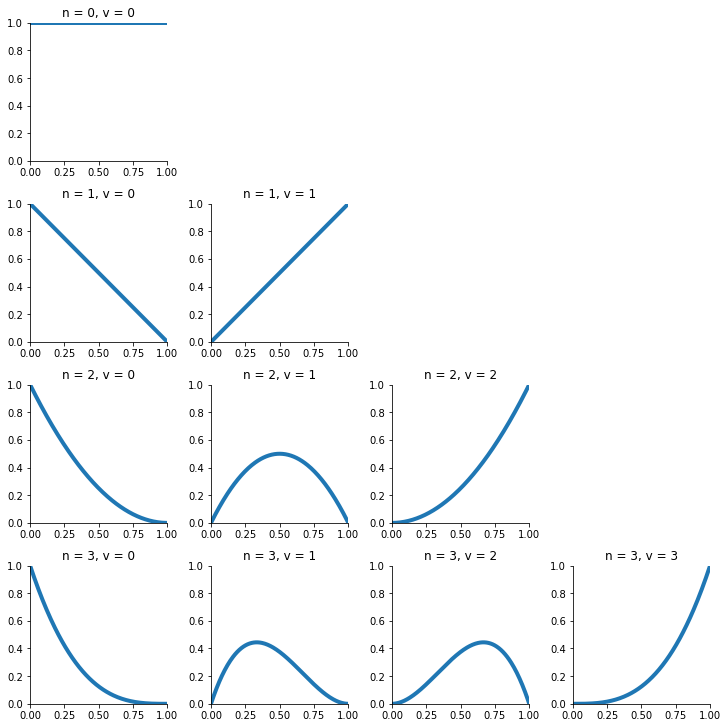

In [13]:
def Bernstein(n, v, x):
    return special.binom(n, v) * x**v * (1-x)**(n-v)

def Bernstein_10_plots():
    xx = np.linspace(0, 1, 200)
    fig, axes = plt.subplots(ncols = 4, nrows = 4, constrained_layout = True, figsize = (10,10))
    for n in range(4):
        for v in range(n+1):
            axes[n, v].plot(xx, Bernstein(n, v, xx), linewidth = 4)
            axes[n, v].set_title('n = %s, v = %s' % (n, v))
            axes[n, v].spines['right'].set_visible(False)
            axes[n, v].spines['top'].set_visible(False)
    for i in ([1, 2, 3, 6, 7, 11]):
        fig.delaxes(axes.flatten()[i])
    plt.setp(axes, xlim = (0,1), ylim = (0,1))
    plt.show()

Bernstein_10_plots()

### Problem 3

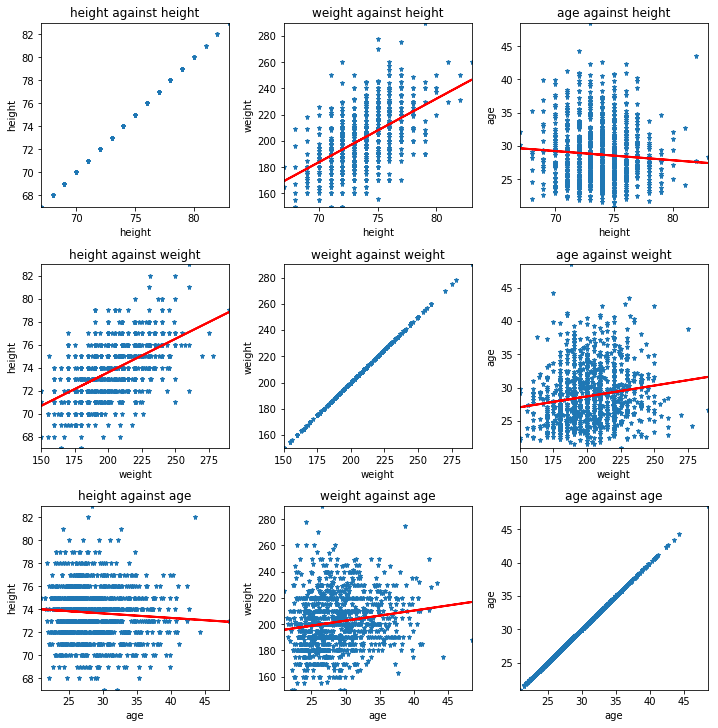

In [14]:
height, weight, age = np.load('MLB.npy').T

def my_scatter(ax, x, y, labelx, labely):
    slope, intercept = stats.linregress(x, y)[0:2]
    ax.plot(x, y, '*', ms = 5)
    ax.set_title('%s against %s' % (labely, labelx),)
    ax.set_xlabel(labelx)
    ax.set_ylabel(labely)
    window = [x.min(), x.max(), y.min(), y.max()]
    ax.axis(window)
    if labelx != labely:
        ax.plot(x, intercept + slope*x, 'r', linewidth = 2)

def problem_3(data, data_labels):
    fig, axes = plt.subplots(ncols = len(data), nrows = len(data), constrained_layout = True, figsize = (10,10))
    for i in range(len(data)):
        for j in range(len(data)):
            my_scatter(axes[i, j], data[i], data[j], data_labels[i], data_labels[j])
    plt.show()

problem_3([height, weight, age], ['height', 'weight', 'age'])

### Problem 5

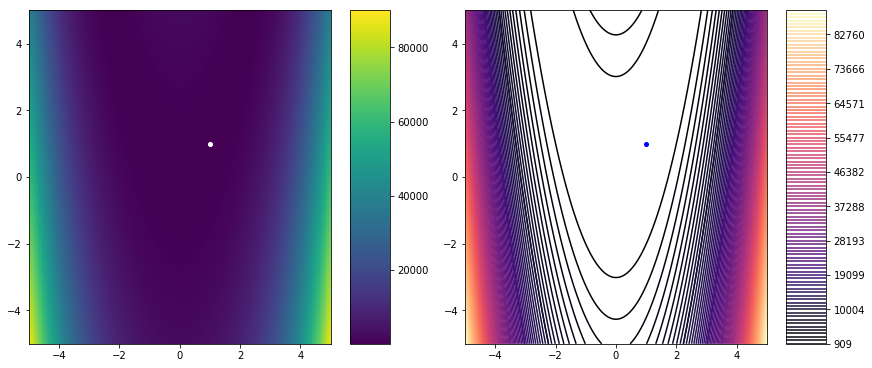

In [15]:
def visual_Rosenbrock(xx):
    X, Y = np.meshgrid(xx, xx)
    Z = (1 - X) ** 2 + 100 * (Y - X ** 2) ** 2
    fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize = (12,5))
    axes[0].pcolormesh(X, Y, Z, cmap = 'viridis')
    cax0 = axes[0].pcolormesh(X, Y, Z, cmap = 'viridis')
    axes[0].plot(1, 1, 'wo', ms = 4)
    fig.colorbar(cax0, ax = axes[0])
    axes[1].contour(X, Y, Z, [np.linspace(Z.min(), Z.max(), 10)], cmap = 'magma')
    cax1 = axes[1].contour(X, Y, Z, [np.linspace(Z.min(), Z.max(), 100)], cmap = 'magma')
    axes[1].plot(1, 1, 'bo', ms = 4)
    fig.colorbar(cax1, ax = axes[1])
    
    plt.show()

xx = np.linspace(-5, 5, 200)
visual_Rosenbrock(xx)

### Problem 6
#### Observation:
- US has largest GDP, China follows.
- US and China's GDP plus together contributes to more than half of the total GDP, seen from pie chart.
- Positive correlation between population and GDP, with US an outlier.
- most of the countries (4) has female heights around 158-159.
- most of the countreis (3 and 3) has male heights around 165 and 175-176.
- Positive correlation between male_height and female_height.

In [16]:
population, GDP, male_height, female_height = np.load('countries.npy').T
countries = np.array(["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"])

def barh_information(countries, info_list, label_info_list):
    fig, axes = plt.subplots(1, len(info_list), figsize = (16, 4), sharey = True)
    for i in range(len(info_list)):
        axes[i].barh(countries, info_list[i])
        axes[i].set_title(label_info_list[i])
    plt.show()

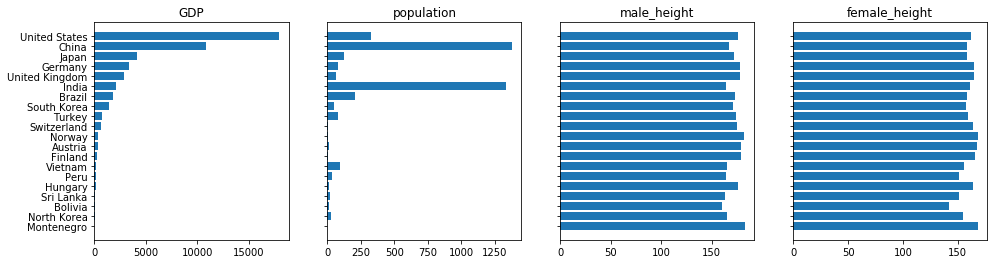

In [17]:
sort_GDP = np.argsort(GDP)
countries, GDP, population, male_height, female_height = countries[sort_GDP], GDP[sort_GDP], population[sort_GDP], \
male_height[sort_GDP], female_height[sort_GDP]
info_list = [GDP, population, male_height, female_height]
label_info_list = ['GDP', 'population', 'male_height', 'female_height']
barh_information(countries, info_list, label_info_list)

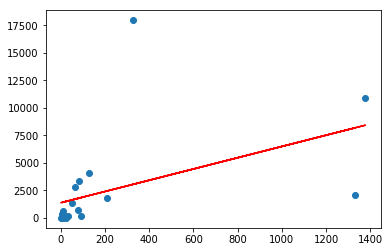

In [18]:
plt.scatter(population, GDP)
slope, intercept = stats.linregress(population, GDP)[0:2]
plt.plot(population, intercept + slope * population, 'r')
plt.show()

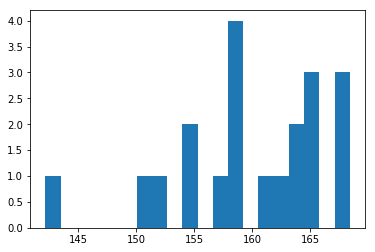

In [19]:
plt.hist(female_height, bins=20)
plt.show()

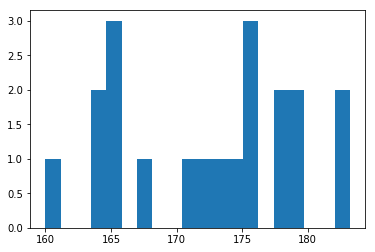

In [20]:
plt.hist(male_height, bins=20)
plt.show()

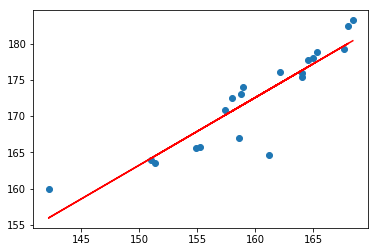

In [21]:
plt.scatter(female_height, male_height)
slope, intercept = stats.linregress(female_height, male_height)[0:2]
plt.plot(female_height, intercept + slope * female_height, 'r')
plt.show()

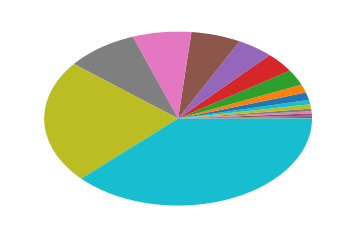

In [22]:
plt.pie(GDP)
plt.show()

## ACME: Intro to Matplotlib
- problems 1-5

### Problem 1

[0.00972007 0.00553991 0.00345148 0.00252756 0.00188132 0.00171986
 0.00135296 0.00119518 0.00107951 0.00105072]


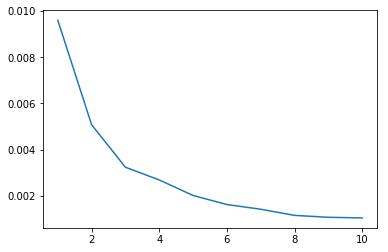

In [23]:
def var_of_mean(n):
    matrix = np.random.normal(size = (n, n))
    mean_of_row = np.mean(matrix, axis = 0)
    return np.var(mean_of_row)
    
def problem_1():
    return np.array([var_of_mean(n) for n in np.array(range(1, 11)) * 100])

print(problem_1())

plt.plot(list(range(1,11)), problem_1())
plt.show()

### Problem 2

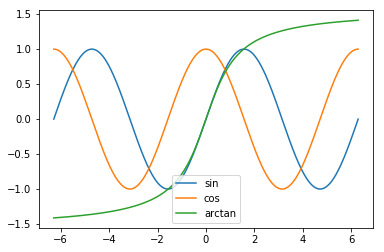

In [24]:
def plot_sin_cos_arctan():
    xx = np.linspace(-2*np.pi, 2*np.pi, 500)
    plt.plot(xx, np.sin(xx), label = 'sin')
    plt.plot(xx, np.cos(xx), label = 'cos')
    plt.plot(xx, np.arctan(xx), label = 'arctan')
    plt.legend()
    plt.show()
    
plot_sin_cos_arctan()

### Problem 3

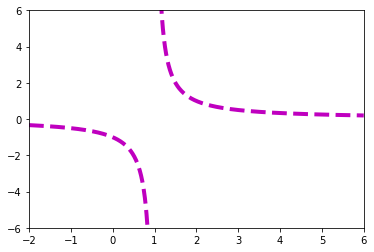

In [25]:
def problem_3():
    xx1 = np.linspace(-2, 1 - 1e-6, 300)
    xx2 = np.linspace(1 + 1e-6, 6 + 1e-6, 600)
    yy1 = 1/(xx1 - 1)
    yy2 = 1/(xx2 - 1)
    plt.plot(xx1, yy1, 'm--', linewidth = 4)
    plt.plot(xx2, yy2, 'm--', linewidth = 4)
    plt.xlim(-2, 6)
    plt.ylim(-6, 6)
    plt.show()
    
problem_3()

### Problem 4

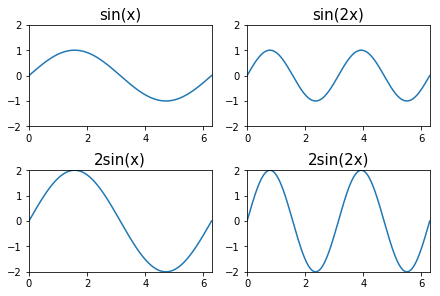

In [26]:
def plot_some_sin_functions():
    
    fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
    
    xx = np.linspace(0, 2*np.pi, 500)
    yy1 = np.sin(xx)
    yy2 = np.sin(2*xx)
    yy3 = 2*np.sin(xx)
    yy4 = 2*np.sin(2*xx)
    
    ax1 = axes[0, 0]
    ax1.plot(xx, yy1)
    ax1.set_title('sin(x)', fontsize = 15)
    
    ax2 = axes[0, 1]
    ax2.plot(xx, yy2)
    ax2.set_title('sin(2x)', fontsize = 15)
    
    ax3 = axes[1, 0]
    ax3.plot(xx, yy3)
    ax3.set_title('2sin(x)', fontsize = 15)
    
    ax4 = axes[1, 1]
    ax4.plot(xx, yy4)
    ax4.set_title('2sin(2x)', fontsize = 15)
    
    plt.setp(axes, xlim = (0, 2*np.pi), ylim = (-2, 2))    
    plt.show()
    
plot_some_sin_functions()

### Problem 5

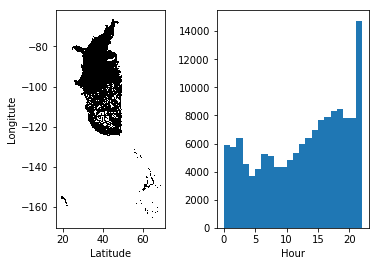

In [27]:
FARS_data = np.load('FARS.npy')
FARS_data

def visualize_SARS(data):
    
    hours = np.array([i[0] for i in data])
    longitude = np.array([i[1] for i in data])
    latitude = np.array([i[2] for i in data])
    
    ax1 = plt.subplot(121)
    ax1.plot(latitude, longitude, 'k,')
    ax1.set_xlabel('Latitude')
    ax1.set_ylabel('Longitute')
    ax1.set_aspect('equal')
    
    ax2 = plt.subplot(122)
    ax2.hist(hours, bins = np.arange(np.min(hours), np.max(hours)))
    ax2.set_xlabel('Hour')
    
visualize_SARS(FARS_data)

## ACME: Object Oriented Programming
- problems 1-4

### Problem 1

In [28]:
class Backpack:
    '''
    A backpack that has a maximum size, can add items, remove items, and to be dumped.
    '''
    
    def __init__(self, name, color, max_size = 5):
        '''initiate the backpack with name, color and maximum size'''
        self.name = name
        self.contents = []
        self.color = color
        self.max_size = max_size
        
    def put(self, item):
        '''put item in backpack if there is still space'''
        if len(self.contents) < self.max_size:
            self.contents.append(item)
        else:
            print('No Room!')
        
    def take(self, item):
        self.contents.remove(item)
        return self.contents
        
    def dump(self):
        '''dump everything in the backpack'''
        self.contents = []
        return self.contents
    
def test_backpack():
    testpack = Backpack("Barry", "black") # Instantiate the object.
    if testpack.name != "Barry": # Test an attribute.
        print("Backpack.name assigned incorrectly")
    for item in ["pencil", "pen", "paper", "computer"]:
        testpack.put(item) # Test a method.
    print("Contents:", testpack.contents)
    testpack.dump()
    if testpack.contents != []:
        print('dump not working')
        
test_backpack()

Contents: ['pencil', 'pen', 'paper', 'computer']


### Problem 2

In [29]:
class Jetpack(Backpack):
    '''
    A pack that carries some stuff and also carries fuel, and you can fly if there is more fuel in the Jectpack than you need
    '''
    
    def __init__(self, name, color, max_size = 2, fuel = 10):
        '''
        initiate the Jectpack with name, color, maximum size and amount of fuel
        '''
        self.name = name
        self.color = color
        self.contents = []
        self.max_size = max_size
        self.fuel = fuel
        
    def fly(self, burn_fuel):
        '''
        input: the amount of fuel you need for the flight
        if fuel not enough for the flight, you will be notified.
        '''
        if burn_fuel < self.fuel:
            self.fuel = burn_fuel
        else:
            print('Not enough fuel!')
        return self.fuel
    
    def dump(self):
        '''
        dump both the content in the Jectpack and the fuel in the Jet pack
        '''
        self.content = []
        self.fuel = 0
        return Jetpack(self.name, self.color, self.max_size, self.fuel)
    

test_jet = Jetpack('JT', 'blue', 5, 100)
print(test_jet.name, test_jet.color, test_jet.max_size, test_jet.fuel)
for item in ['apple', 'laptop', 'python', 'matlab', 'C++']:
    test_jet.put(item)
print(test_jet.contents)
test_jet.put(['Julia'])
print(test_jet.contents)
print(test_jet.fly(50), test_jet.fly(150))
print(test_jet.dump().contents, test_jet.dump().fuel)

# all works

JT blue 5 100
['apple', 'laptop', 'python', 'matlab', 'C++']
No Room!
['apple', 'laptop', 'python', 'matlab', 'C++']
Not enough fuel!
50 50
[] 0


### Problem 3

In [30]:
class Backpack:
    '''
    A backpack that has a maximum size, can add items, remove items, and to be dumped.
    '''
    
    def __init__(self, name, color, max_size = 5):
        '''initiate the backpack with name, color and maximum size'''
        self.name = name
        self.contents = []
        self.color = color
        self.max_size = max_size
        
    def put(self, item):
        '''put item in backpack if there is still space'''
        if len(self.contents) < self.max_size:
            self.contents.append(item)
        else:
            print('No Room!')
        
    def take(self, item):
        self.contents.remove(item)
        return self.contents
        
    def dump(self):
        '''dump everything in the backpack'''
        self.contents = []
        return self.contents
    
    def __eq__(self, other):
        '''
        return True iff two backpacks have the same name, color, and number of contents'''
        if (self.name, self.color, len(self.contents)) == (other.name, other.color, len(other.contents)):
            return True
        else:
            return False
        
    def __str__(self):
        '''used for print'''
        return 'Owner: \t  {} \n\
Color: \t  {} \n\
Size: \t  {} \n\
Max Size: {} \n\
Contents: {}'.format(self.name, self.color, int(len(self.contents)), self.max_size, self.contents)

    

testpack1 = Backpack("Barry", "black") # Instantiate the object.
for item in ["pencil", "pen", "paper", "computer"]:
    testpack1.put(item) 

testpack2 = Backpack("Barry", "black") # Instantiate the object.
for item in ["pencil", "pen", "paper", "computer"]:
    testpack2.put(item) 

testpack3 = Backpack("JT", "blue") # Instantiate the object.
for item in ["pencil", "pen", "paper", "computer"]:
    testpack3.put(item) 
    
print(testpack1 == testpack2)
print(testpack1 == testpack3)
print(testpack1)

# all works fine

True
False
Owner: 	  Barry 
Color: 	  black 
Size: 	  4 
Max Size: 5 
Contents: ['pencil', 'pen', 'paper', 'computer']


### Problem 4

In [31]:
class ComplexNumber:
    '''generate complex number based on real part and imaginary part
    methods includes conjugate
    magic methods include str, abs, eq, add, sub, mul, truediv'''
    
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
        
    def conjugate(self):
        return ComplexNumber(self.real, -self.imag)
    
    def __str__(self):
        if self.imag >= 0:
            return '({}+{}j)'.format(self.real, self.imag)
        if self.imag < 0:
            return '({}-{}j)'.format(self.real, self.imag)
        
    def __abs__(self):
        import numpy as np
        return np.sqrt(self.real**2 + self.imag**2)
    
    def __eq__(self, other):
        if (self.real, self.imag) == (other.real, other.imag):
            return True
        else:
            return False
        
    def __add__(self, other):
        return ComplexNumber(self.real + other.real, self.imag + other.imag)
    
    def __sub__(self, other):
        return ComplexNumber(self.real - other.real, self.imag - other.imag)
    
    def __mul__(self, other):
        new_real = self.real * other.real - self.imag * other.imag
        new_imag = self.real * other.imag + self.imag * other.real
        return ComplexNumber(new_real, new_imag)
    
    def __truediv__(self, other):
        factor = 1 / (other.real**2 + other.imag**2)
        new_real = factor * (self.real * other.real + self.imag * other.imag)
        new_imag = factor * (self.imag * other.real - self.real * other.imag)
        return ComplexNumber(new_real, new_imag)

    
def test_ComplexNumber(a, b, c, d):
    py_cnum, my_cnum = complex(a, b), ComplexNumber(a, b)
    py_cnum2, my_cnum2 = complex(c, d), ComplexNumber(c, d)
    # Validate the constructor.
    if my_cnum.real != a or my_cnum.imag != b:
        print("__init__() set self.real and self.imag incorrectly")
    # Validate conjugate() by checking the new number's imag attribute.
    if py_cnum.conjugate().imag != my_cnum.conjugate().imag:
        print("conjugate() failed for", py_cnum)
    # Validate __str__().
    if str(py_cnum) != str(my_cnum):
        print("__str__() failed for", py_cnum)
    # Validate __abs__().
    if abs(py_cnum) != abs(my_cnum):
        print("__abs__() failed for", py_cnum)
    # Validate __eq__().
    if (a, b) == (c, d):
        if my_cnum != my_cnum2:
            print("__eq__() failed for equal", py_cnum, py_cnum2)
    if (a, b) != (c, d):
        if my_cnum == my_cnum2:
            print("__eq__() failed for unequal", py_cnum, py_cnum2)
    # Validate __add__().
    if py_cnum + py_cnum2 != my_cnum + my_cnum2:
        print("__add__() failed for", py_cnum, py_cnum2)
    # Validate __aub__().
    if py_cnum - py_cnum2 != my_cnum - my_cnum2:
        print("__sub__() failed for", py_cnum, py_cnum2)
    # Validate __mul__().
    if py_cnum * py_cnum2 != my_cnum * my_cnum2:
        print("__mul__() failed for", py_cnum, py_cnum2)
    # Validate __turediv__().
    if py_cnum / py_cnum2 != my_cnum / my_cnum2:
        print("__truediv__() failed for", py_cnum, py_cnum2)
        
test_ComplexNumber(1,2,3,4) 
test_ComplexNumber(1,2,1,2) # nothing printed, so everything works fine

## ACME: Exceptions and File/IO
- problems 1-4
- the running cells is are not included as there are spcific instructions to be given when running

### Problem 1

In [32]:
def arithmagic():
    step_1 = input("Enter a 3-digit number where the first and last "
    "digits differ by 2 or more: ")
    if len(step_1) != 3:
        print('The first number (step_1) is not a 3-digit number.')
    elif abs(int(step_1[2]) - int(step_1)[2]) <= 2:
        print('The first number’s first and last digits differ by less than 2.')
    step_2 = input("Enter the reverse of the first number, obtained "
    "by reading it backwards: ")
    if step_2[-1::-1] != step_1:
        print('The second number (step_2) is not the reverse of the first number.')
    step_3 = input("Enter the positive difference of these numbers: ")
    if abs(int(step_2) - int(step_1)) != step_3:
        print('The third number (step_3) is not the positive difference of the first two numbers.')
    step_4 = input("Enter the reverse of the previous result: ")
    if step_4[-1::-1] != step_3:
        print('The fourth number (step_4) is not the reverse of the third number.')
    print(str(step_3), "+", str(step_4), "= 1089 (ta-da!)")

### Problem 2

In [33]:
from random import choice
def random_walk(max_iters=1e12):
    walk = 0
    directions = [1, -1]
    for i in range(int(max_iters)):
        try:
            walk += choice(directions)
        except KeyboardInterrupt as e:
            print('Process interrupted at iteration {}'.format(i))
            return walk # return at the iteration where it stops
    try:
        return walk
    finally:
            print('Process completed')

### Problem 3 and 4
- transpose got some problem

In [34]:
class ContentFilter:
    '''a class helps to read contents'''
    
    def __init__(self, name):
        self.name = name
        valid = False
        while valid == False:
            try:
                myfile = open(self.name, 'r')
            except (FileNotFoundError, TypeError, OSError) as e:
                print(e)
                self.name = input('Please enter a valid file name:')
                print(self.name)
            else:
                valid = True
        self.contents = myfile.readlines()
        myfile.close()
        
    def uniform(self, file_name, mode = 'w', case = 'upper'):
        if mode == 'w':
            new_file = open(file_name, 'w')
        elif mode == 'x':
            new_file = open(file_name, 'x')
        elif mode == 'a':
            new_file = open(file_name, 'a')
        else:
            raise ValueError('mode has to be "w" or "x" or "a"')
        if case == 'upper':
            contents = self.contents.upper()
        elif case == 'lower':
            contents = self.contesnt.lower()
        else:
            raise ValueError('case has to be "upper" or "lower"')
        new_file.write(contents)
        new_file.close
        
    def reverse(self, file_name, mode = 'w', unit = 'line'):
        if mode == 'w':
            new_file = open(file_name, 'w')
        elif mode == 'x':
            new_file = open(file_name, 'x')
        elif mode == 'a':
            new_file = open(file_name, 'a')
        else:
            raise ValueError('mode has to be "w" or "x" or "a"')
        if unit == 'line':
            contents = self.contents.split('\n')[::-1]
        if unit == 'word':
            contents = self.contents.split()[::-1]
        new_file.write(contents)
        
    def transpose(self, file_name, mode = 'w'): # dont know how to do the transpose.
        if mode == 'w':
            new_file = open(file_name, 'w')
        elif mode == 'x':
            new_file = open(file_name, 'x')
        elif mode == 'a':
            new_file = open(file_name, 'a')
        else:
            raise ValueError('mode has to be "w" or "x" or "a"')
        contents = self.contents.split('\n')
        for i in range(len(contents)):
            contents[i] = contents[i].split()